In [1]:
# loading all the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading the dataset
df = pd.read_csv('G:\Resume_projects\Machine Learnig\linear regression\Dataset\Avacado_Price.csv')
df.head()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
# converting into numerical
df['type'].unique()
df['type'] = df['type'].map({'conventional':1, 'organic':2})

In [5]:
df['region'].unique()
df['region'] = df['region'].map({'Albany':1, 'Atlanta':2, 'BaltimoreWashington':3, 'Boise':4, 'Boston':5,
       'BuffaloRochester':6, 'California':7, 'Charlotte':8, 'Chicago':9,
       'CincinnatiDayton':10, 'Columbus':11, 'DallasFtWorth':12, 'Denver':13,
       'Detroit':14, 'GrandRapids':15, 'GreatLakes':16, 'HarrisburgScranton':17,
       'HartfordSpringfield':18, 'Houston':19, 'Indianapolis':20, 'Jacksonville':21,
       'LasVegas':22, 'LosAngeles':23, 'Louisville':24, 'MiamiFtLauderdale':25,
       'Midsouth':26, 'Nashville':27, 'NewOrleansMobile':28, 'NewYork':29,
       'Northeast':30, 'NorthernNewEngland':31, 'Orlando':32, 'Philadelphia':33,
       'PhoenixTucson':34, 'Pittsburgh':35, 'Plains':36, 'Portland':37,
       'RaleighGreensboro':38, 'RichmondNorfolk':39, 'Roanoke':40, 'Sacramento':41,
       'SanDiego':42, 'SanFrancisco':43, 'Seattle':44, 'SouthCarolina':45,
       'SouthCentral':46, 'Southeast':47, 'Spokane':48, 'StLouis':49, 'Syracuse':50,
       'Tampa':51, 'TotalUS':52, 'West':53, 'WestTexNewMexico':54})


In [8]:
df.head()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,1


In [9]:
df.shape

(18249, 12)

In [10]:
x = df.drop(columns=['AveragePrice'], axis=1)
x.head()

,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,1
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,1
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,1
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,1
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,1


In [11]:
y = df['AveragePrice']
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [14]:
# Check the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
vif = pd.DataFrame()
vif['value'] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif['name'] = x.columns
vif

,value,name
0,5.212276e+09,Total_Volume
1,6.946789e+08,tot_ava1
2,6.332790e+08,tot_ava2
3,4.973232e+06,tot_ava3
4,2.502000e+14,Total_Bags
5,1.429714e+14,Small_Bags
6,1.521486e+13,Large_Bags
7,7.855572e+10,XLarge Bags
8,1.061578e+01,type
9,1.372885e+01,year


In [16]:
x.drop(columns=['tot_ava1', 'tot_ava2'], axis=1, inplace=True)

In [17]:
x.head()

,Total_Volume,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,64236.62,48.16,8696.87,8603.62,93.25,0.0,1,2015,1
1,54876.98,58.33,9505.56,9408.07,97.49,0.0,1,2015,1
2,118220.22,130.50,8145.35,8042.21,103.14,0.0,1,2015,1
3,78992.15,72.58,5811.16,5677.40,133.76,0.0,1,2015,1
4,51039.60,75.78,6183.95,5986.26,197.69,0.0,1,2015,1


In [19]:
# Splitting
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)
y_pred = regression.predict(x_test)

In [23]:
from sklearn.metrics import r2_score

In [25]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 38.00


Text(0, 0.5, 'Predicted')

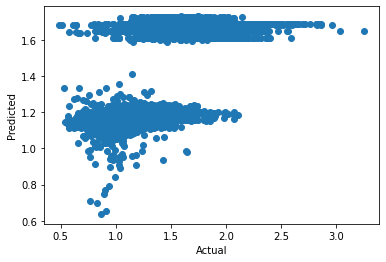

In [26]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [27]:
# adj r2
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [29]:
adj_r2(x_test,y_test)*100

37.851075109456126

# applying overfitting and underfitting check

In [37]:
from sklearn.linear_model import LassoCV,Lasso

In [38]:
lasso = LassoCV(cv = 10, max_iter = 200000, normalize = True)
lasso.fit(x_train,y_train)


c:\Users\mksmu\Miniconda3\envs\project\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


LassoCV(cv=10, max_iter=200000, normalize=True)

In [39]:
lasso.alpha_

2.066094909958881e-06

In [40]:
lass = Lasso(alpha=lasso.alpha_)
lass.fit(x_train,y_train)

c:\Users\mksmu\Miniconda3\envs\project\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.938e+02, tolerance: 2.372e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=2.066094909958881e-06)

In [42]:
lasso.score(x_test,y_test)*100

38.02775945278077

In [43]:
import pickle
pickle.dump(regression, open('notebook.pickle', 'wb'))